## Import Librairies

In [6]:
import os
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score                                    # Métriques
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix         # Métriques
from sklearn.model_selection import GridSearchCV                                            # Pour la recherche d'hyperparamètres 
from sklearn.linear_model import LinearRegression                                           # Pour le régression linéaire
from sklearn.linear_model import LogisticRegression                                         # Pour la régression logistique
from sklearn.tree import DecisionTreeClassifier                                             # Pour l'arbre de décision
from sklearn.ensemble import BaggingClassifier                                              # Pour le Bagging
from sklearn.ensemble import RandomForestClassifier                                         # Pour le Random Forest
from sklearn.ensemble import GradientBoostingClassifier                                     # Pour le Boosting
from colorama import init, Fore, Back, Style                                                # Pour la police et les couleurs

In [2]:
print(os.getcwd())

C:\Users\maeva\OneDrive\M1\projet_ML\notebooks\exo1


#### Copier le chemin de vos données ici

In [3]:
print(os.getcwd())
current_path = os.getcwd()
path = os.path.abspath(os.path.join(current_path, '..'))
path

C:\Users\maeva\OneDrive\M1\projet_ML\notebooks\exo1


'C:\\Users\\maeva\\OneDrive\\M1\\projet_ML\\notebooks'

In [4]:
path1 = os.path.abspath(os.path.join(current_path, '..'))
path1

'C:\\Users\\maeva\\OneDrive\\M1\\projet_ML\\notebooks'

In [5]:
path_data = os.path.join(path, 'data')
os.chdir(path_data)
print(os.getcwd())

C:\Users\maeva\OneDrive\M1\projet_ML\notebooks\data


## Exercice 1: Régression binaire

### Data exploration

In [7]:
# Chargement des données
dfsimu = pd.read_csv("simu.txt",sep=" ")
dfsimu.head()

,X1,X2,Y
0,-1.681427,-1.534811,1
1,-0.690532,0.710814,1
2,4.676125,-1.624768,2
3,0.211525,3.657683,2
4,0.387863,0.522408,2


In [8]:
# Informations sur la base de données
dfsimu.info()
# Vérifier les valeurs nulles dans le DataFrame
print(dfsimu.isna().sum())
# Statistiques descriptives
display(dfsimu.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      2000 non-null   float64
 1   X2      2000 non-null   float64
 2   Y       2000 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 47.0 KB
X1    0
X2    0
Y     0
dtype: int64


,X1,X2,Y
count,2000.000000,2000.000000,2000.000000
mean,0.087890,-0.043909,1.414000
std,3.001684,2.955444,0.492672
min,-9.143583,-9.387265,1.000000
25%,-1.931862,-1.944058,1.000000
50%,0.086439,-0.074521,1.000000
75%,2.125775,1.945073,2.000000
max,10.171112,10.263284,2.000000


Il y a 2 variables explicatives X1 et X2 et une variable expliquée Y qui est binaire (valeurs= 1 ou 2).

Aucune valeur manquante.

# Question 1: Choix du meilleur modèle possible

Vu la nature du problème (regression binaire), des modèles tels que la régression logistique, les arbres de décision ou le Random Forest pourraient être appropriés.
On va commencer par des modèles simples, puis monter en complexité.
Tout d'abord, on divise nos données.

#### Division des données

In [9]:
X = dfsimu[['X1','X2']]
y = dfsimu['Y']
# Division des données : 80% Train, 20% Test
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

## Modèle 0: Régression linéaire

#### Initialisation et entrainement du modèle

In [10]:
# Initialisation le modèle de régression linéaire
model0 = LinearRegression()

# Entraînement du modèle
model0.fit(X_train, y_train)              #On réalise notre régression linéaire sur l'ensemble train

# Prédiction sur les valeurs de l'ensemble de test
y_pred0 = model0.predict(X_test)          #On récupère les prédictions du modèle concernant les "nouvelles données"

#### Evaluation de la performance

In [11]:
# Mésures de performance
mse = mean_squared_error(y_test, y_pred0) #Cela nous permet de mésurer l'écart entre les valeurs prédites et les valeurs réelles
r2 = r2_score(y_test, y_pred0)            #Il mésure la capacité explicative de notre modèle.

print(Fore.GREEN + Style.BRIGHT)
print(f"MSE: {mse}")
print(f"R2: {r2}")


MSE: 0.22721287305046942
R2: 0.06410102749266033


#### Interpretations

On a une MSE un peu élévée et un R2 beaucoup trop faible. De plus, ce modèle n'est pas adapté à notre problème de classification binaire car notre variable expliquée est discrète.
Etant donné que notre variable expliquée est binaire, on va faire une regression logistique.

## Modèle 1: Régression logistique

#### Initialisation et entrainement du modèle

In [12]:
# Initialisation du modèle de régression logistique
model1 = LogisticRegression(penalty='l2',random_state=42)     #On utilise la régularisation Ridge pour prévenir l'overfitting

# Entraînement du modèle
model1.fit(X_train, y_train)              

# Prédiction sur les valeurs de l'ensemble de test
y_pred1 = model1.predict(X_test)           

#### Evaluation de la performance


Accuracy: 0.6725
Rapport de classification:
              precision    recall  f1-score   support

           1       0.67      0.88      0.76       234
           2       0.69      0.39      0.49       166

    accuracy                           0.67       400
   macro avg       0.68      0.63      0.63       400
weighted avg       0.68      0.67      0.65       400



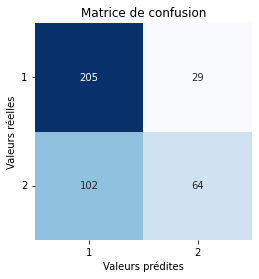

In [13]:
# Mesures de performance
accuracy = accuracy_score(y_test, y_pred1)                    #Il mésure à quel point notre modèle est précis
scores = classification_report(y_test, y_pred1)               #Pour les autres scores(F1, recall...)
conf_matrix = confusion_matrix(y_test, y_pred1)               #Permet une bonne visualisation des predictions vs. réalité

print(Fore.GREEN + Style.BRIGHT)
print(f"Accuracy: {accuracy}")                               
print(f"Rapport de classification:\n{scores}")
class_labels = ['1', '2']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
           xticklabels=class_labels, yticklabels=class_labels)
plt.yticks(rotation=0)
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")
plt.title("Matrice de confusion")
plt.show()

#### Interpretations

D'après nos différentes métriques:

-On a une accuracy de 67,25% : La régression logistique est plutot performante.

-On a une meilleure sensibilité(capacité du modèle à retrouver les Y=1)(recall=0.88) mais une faible spécificité (0.39): Le modèle se trompe beaucoup sur la classe 2. Cela peut etre dû au fait que les deux classes sont un peu déséquilibrées.

On va essayer d'autres modèles.

## Modèle 2: Arbre de décision

#### Initialisation, optimisation et entrainement du modèle

In [14]:
# Initialisation du modèle de l'arbre de décision simple
dtree_model = DecisionTreeClassifier(random_state=42)

# On crée un dictionnaire des hyperparamètres que nous voulons tester pour l'optimisation de l'arbre de décision
param_grid = {'criterion': ['gini', 'entropy'],    
              'max_depth': np.arange(3, 15)}

# On utilise la recherche en grille (GridSearch) pour tester toutes les combinaisons d'hyperparamètres
dtree_gscv = GridSearchCV(dtree_model, param_grid, cv=5)

# Entraînement du modèle
dtree_gscv.fit(X_train, y_train)
print(Fore.BLUE + Style.BRIGHT)
print("Meilleurs paramètres:",dtree_gscv.best_params_)     #Pour afficher les meilleurs hyperparamètres trouvés par la Gridsearch


Meilleurs paramètres: {'criterion': 'entropy', 'max_depth': 7}


In [16]:
# On établit enfin notre arbre de décision optimisé
model2 = DecisionTreeClassifier(**dtree_gscv.best_params_,random_state=42)

# Entrainement du modèle
model2.fit(X_train, y_train)

# Prédiction sur les valeurs de l'ensemble de test
y_pred2 = model2.predict(X_test)

#### Evaluation de la performance


Accuracy: 0.7675
Rapport de classification:
              precision    recall  f1-score   support

           1       0.79      0.81      0.80       234
           2       0.73      0.70      0.72       166

    accuracy                           0.77       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.77      0.77      0.77       400



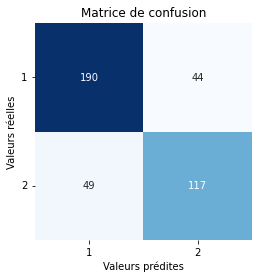

In [17]:
# Mésures de performances
accuracy = accuracy_score(y_test, y_pred2)
scores = classification_report(y_test, y_pred2)
conf_matrix = confusion_matrix(y_test, y_pred2) 

print(Fore.GREEN + Style.BRIGHT)
print(f"Accuracy: {accuracy}")                               
print(f"Rapport de classification:\n{scores}")
class_labels = ['1', '2']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
           xticklabels=class_labels, yticklabels=class_labels)
plt.yticks(rotation=0)
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")
plt.title("Matrice de confusion")
plt.show()

#### Interpretations

L'arbre de décision est facilement interpretable.

D'après nos différentes métriques:

-On a une accuracy de 76,75% : Donc, notre arbre de décision est plus performant que la régression logistique.

-On a d'assez bons recall (0.81 pour 1 et 0.70 pour 2)

-Cependant, il y a de fortes variations de l'arbre si on change les données d'entrainement

On peut encore monter en performance.
Explorons d'autres modèles.

## Modèle 3: Bagging

#### Initialisation, optimisation et entrainement du modèle

In [16]:
# Modèle de base
bag_model = BaggingClassifier(random_state=42)

# Paramètres pour l'optimisation
param_grid = {
    'n_estimators': [10, 30, 50],    # Nombre d'arbres
    'max_samples': [0.5, 0.7, 1.0],  # Fraction d'échantillons à utiliser pour chaque arbre (bootstrap)
               }

# Recherche en grille des hyperparamètres
bag_gscv = GridSearchCV(bag_model, param_grid, cv=5, scoring='accuracy')

# Entrainement du modèle
bag_gscv.fit(X_train, y_train)
print(Fore.BLUE + Style.BRIGHT)
print("Meilleurs paramètres :", bag_gscv.best_params_) #Pour afficher les meilleurs hyperparamètres trouvés par la Gridsearch


Meilleurs paramètres : {'max_samples': 0.5, 'n_estimators': 50}


In [17]:
# On établit enfin notre modèle optimisé
model3 = BaggingClassifier(**bag_gscv.best_params_, random_state=42)

# Entrainement du modèle
model3.fit(X_train, y_train)

# Prédiction sur les valeurs de l'ensemble de test
y_pred3 = model3.predict(X_test)

#### Evaluation de la performance


Accuracy: 0.7825
Rapport de classification:
              precision    recall  f1-score   support

           1       0.81      0.82      0.82       234
           2       0.74      0.73      0.74       166

    accuracy                           0.78       400
   macro avg       0.78      0.77      0.78       400
weighted avg       0.78      0.78      0.78       400



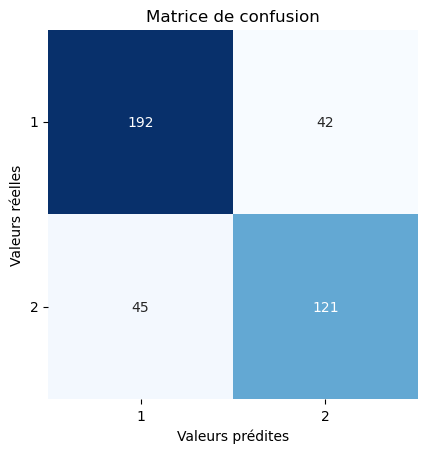

In [18]:
# Mésures de performances
accuracy = accuracy_score(y_test, y_pred3)
scores = classification_report(y_test, y_pred3)
conf_matrix = confusion_matrix(y_test, y_pred3) 

print(Fore.GREEN + Style.BRIGHT)
print(f"Accuracy: {accuracy}")                               
print(f"Rapport de classification:\n{scores}")
class_labels = ['1', '2']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
           xticklabels=class_labels, yticklabels=class_labels)
plt.yticks(rotation=0)
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")
plt.title("Matrice de confusion")
plt.show()

#### Interpretations

Le modèle de Bagging des arbres est un peu plus performant que l'arbre de décicision tout seul, d'après nos métriques.

## Modèle 4: Random Forest

#### Initialisation, optimisation et entrainement du modèle

In [19]:
# Grille des hyperparamètres à explorer
param_grid = {
    'n_estimators': [50, 100],                      #Nombre d'arbres
    'max_depth': [2, 5, 10],                        #Profondeur maximale des arbres
    'max_samples': [0.2, 0.7, 1]                    #Fraction d'échantillons à utiliser pour chaque arbre (bootstrap)
               }

# Initialisation du modèle de Random Forest
rf_model = RandomForestClassifier(random_state=42)

# Recherche d'hyperparamètres avec GridSearchCV
rf_gscv = GridSearchCV(rf_model, param_grid, cv=5, scoring='accuracy')

# Entraînement du modèle
rf_gscv.fit(X_train, y_train)
print(Fore.BLUE + Style.BRIGHT)
print("Meilleurs paramètres:", rf_gscv.best_params_)


Meilleurs paramètres: {'max_depth': 10, 'max_samples': 0.2, 'n_estimators': 100}


In [20]:
# Modèle avec les meilleurs hyperparamètres
model4 = RandomForestClassifier(**rf_gscv.best_params_,random_state=42)

# Entrainement du modèle
model4.fit(X_train, y_train)

# Prédiction sur les valeurs de l'ensemble de test
y_pred4 = model4.predict(X_test)

#### Evaluation de la performance


Accuracy: 0.8
Rapport de classification:
              precision    recall  f1-score   support

           1       0.83      0.83      0.83       234
           2       0.76      0.76      0.76       166

    accuracy                           0.80       400
   macro avg       0.79      0.79      0.79       400
weighted avg       0.80      0.80      0.80       400



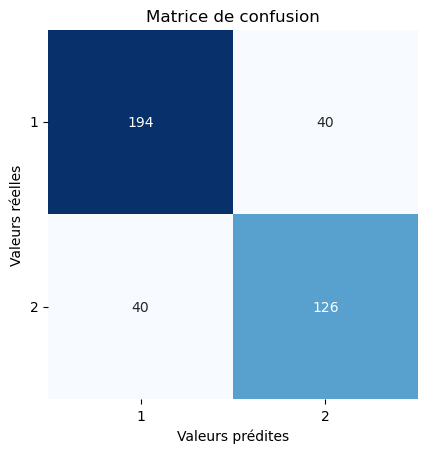

In [21]:
# Mésures de performances
accuracy = accuracy_score(y_test, y_pred4)
scores = classification_report(y_test, y_pred4)
conf_matrix = confusion_matrix(y_test, y_pred4) 

print(Fore.GREEN + Style.BRIGHT)
print(f"Accuracy: {accuracy}")                               
print(f"Rapport de classification:\n{scores}")
class_labels = ['1', '2']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
           xticklabels=class_labels, yticklabels=class_labels)
plt.yticks(rotation=0)
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")
plt.title("Matrice de confusion")
plt.show()

#### Interpretations

D'après nos métriques:

Notre modèle a une précision globale de 80%, il surpasse ainsi les modèles précédents en termes de performance.
Le recall, qui mésure la capacité du modèle à identifier correctement les instances d'une classe est également très bon (83% pour 1 et de 76% pour 2).

On a aussi de bons scores en général.(F1-score: 83% et 76%)

Cependant, d’autres réglages des hyperparamètres pourraient changer ces résultats.

En résumé, le modèle présente une performance globale solide avec une légère asymétrie dans la précision entre les deux classes. Cependant, on perd en interpretabilité. On a tout de même le critère d'importance des variables.

#### Importance des variables

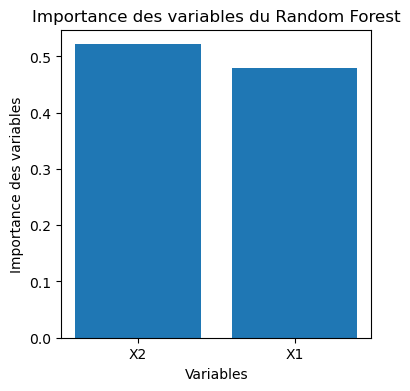

In [22]:
importance = model4.feature_importances_
indices = np.argsort(importance)[::-1]             #Donne les indices triés par ordre décroissant d'importance des variables

#Affichage de l'importance
plt.figure(figsize=(4, 4))
plt.bar(range(X_train.shape[1]), importance[indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[indices])
plt.xlabel("Variables")
plt.ylabel("Importance des variables")
plt.title("Importance des variables du Random Forest")     
plt.show()

Les deux variables ont quasiment le même niveau d'importance.
On aurait eu des résultats plus intéressants si on avait un bon nombre de variables.

Explorons un dernier modèle...

## Modèle 5: Boosting algorithme Gradient Boosting

#### Initialisation, optimisation et entrainement du modèle

In [23]:
# Grille des hyperparamètres
param_grid = {
    'n_estimators': [50, 75, 100],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth':[3,5,7]
               }

# Initialisation du modèle de Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)

# Recherche d'hyperparamètres avec GridSearchCV
gb_gscv = GridSearchCV(gb_model, param_grid, cv=5, scoring='accuracy')

# Entraînement du modèle
gb_gscv.fit(X_train, y_train)
print(Fore.BLUE + Style.BRIGHT)
print("Meilleurs paramètres",gb_gscv.best_params_)


Meilleurs paramètres {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [24]:
# Modèle avec les meilleurs hyperparamètres
model_5 = GradientBoostingClassifier(**gb_gscv.best_params_, random_state= 42)

# Entrainement du modèle
model_5.fit(X_train, y_train)

# Prédiction sur les valeurs de l'ensemble de test
y_pred5 = model_5.predict(X_test)

#### Evaluation de la performance


Accuracy: 0.78
Rapport de classification:
              precision    recall  f1-score   support

           1       0.80      0.83      0.82       234
           2       0.75      0.71      0.73       166

    accuracy                           0.78       400
   macro avg       0.77      0.77      0.77       400
weighted avg       0.78      0.78      0.78       400



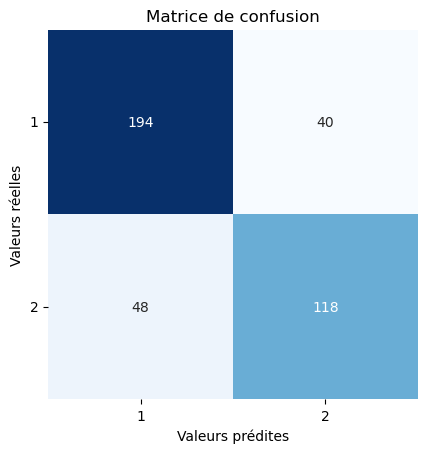

In [25]:
accuracy = accuracy_score(y_test, y_pred5)
conf_matrix = confusion_matrix(y_test, y_pred5)
scores = classification_report(y_test, y_pred5)

print(Fore.GREEN + Style.BRIGHT)
print(f"Accuracy: {accuracy}")                               
print(f"Rapport de classification:\n{scores}")
class_labels = ['1', '2']
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
           xticklabels=class_labels, yticklabels=class_labels)
plt.yticks(rotation=0)
plt.ylabel("Valeurs réelles")
plt.xlabel("Valeurs prédites")
plt.title("Matrice de confusion")
plt.show()

#### Interpretations

Le modèle a correctement classé environ 78% de l'échantillon. C'est un bon score mais moins performant que le Random Forest et légèrement moins que le Bagging.

Le recall est de 83% pour la classe 1 et de 71% pour la classe 2 : ce qui est correct mais moins bon que ceux du Random Forest

En comparaison, le modèle Random Forest semblait avoir de meilleures performances. Cependant, il est important de considérer le choix des hyperparamètres qui peut jouer sur la performance.

## Conclusion sur le choix du modèle

Le modèle du Random Forest semble être le plus approprié, compte tenu de tout ce qui a été dit plus haut.

On aurait pu monter encore plus haut en performance avec du Deep Learning, mais on aurait perdu grandement en interpretabilité et la structure de nos données ne nécéssite pas un tel niveau de complexité.

# Question 2: Prédictions avec nouvelles variables

### Chargement de nouvelles données

In [26]:
df_xsimu = pd.read_csv("xsimutest.txt",sep=" ")
df_xsimu.head()

,X1,X2
0,1.533001,5.794728
1,5.423978,-1.849424
2,-5.107845,-1.687702
3,0.862346,-2.969889
4,-0.807342,8.193683


### Data exploration

In [27]:
# Informations sur la base de données
df_xsimu.info()
# Vérifier les valeurs nulles dans le DataFrame
print(df_xsimu.isna().sum())
# Statistiques descriptives
display(df_xsimu.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      1000 non-null   float64
 1   X2      1000 non-null   float64
dtypes: float64(2)
memory usage: 15.8 KB
X1    0
X2    0
dtype: int64


,X1,X2
count,1000.000000,1000.000000
mean,0.059809,-0.143525
std,3.133790,2.947674
min,-10.402470,-10.206071
25%,-2.098294,-2.132507
50%,0.020087,-0.263866
75%,2.182233,1.861905
max,11.543303,9.202502


In [28]:
# Prédictions sur les valeurs du nouvel ensemble
y_predx = model4.predict(df_xsimu)

### Enregistrement du vecteur des prédictions sous format .txt

In [29]:
predictions = pd.DataFrame(y_predx)
predictions.to_csv('predictions.txt', index=False, header=False, sep='\n')  # Le séparateur est le retour chariot '\n'